In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [152]:
## import dataset
df = pd.read_csv('./data/exoplanets-clean.csv')

null_col_vals = df.isnull().sum().to_dict()
NUM_ROWS = df.shape[0]

thresholdAmount = 0.3 * NUM_ROWS

dropped = []
for key in null_col_vals:
    if(null_col_vals[key] >= thresholdAmount):
        dropped.append(key)

df = df.drop(columns=dropped, axis=1)
df = df.dropna()

df.head()

,num_stars,single_planet_exosystem,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
30,3,True,Imaging,2015,Gemini Observatory,0,11688.000000,6209.250000,-3287.250000,0.0,...,-0.120300,5.21149,0.023,-0.023,4.537,0.024,-0.024,5.15806,0.002308,-0.002308
32,2,False,Radial Velocity,1996,Lick Observatory,0,14.651600,0.000100,-0.000100,0.0,...,-0.012300,5.95084,0.023,-0.023,4.015,0.036,-0.036,5.72973,0.000852,-0.000852
35,2,False,Radial Velocity,2004,McDonald Observatory,0,0.736547,0.000001,-0.000001,0.0,...,-0.012300,5.95084,0.023,-0.023,4.015,0.036,-0.036,5.72973,0.000852,-0.000852
52,1,False,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),0,8.463080,0.000060,-0.000060,0.0,...,-0.004625,8.81000,0.100,-0.100,4.529,0.020,-0.020,7.84038,0.000731,-0.000731
53,1,False,Transit,2021,Transiting Exoplanet Survey Satellite (TESS),0,18.859690,0.000080,-0.000080,0.0,...,-0.004625,8.81000,0.100,-0.100,4.529,0.020,-0.020,7.84038,0.000731,-0.000731


In [153]:
# Converting Strings to numbers
dictMethod = {}
count = 0
for value in df['discoverymethod']:
    if value not in dictMethod:
        dictMethod[value] = count
        count += 1
df['discoverymethod'] = df['discoverymethod'].map(dictMethod)

dictFac = {}
count2 = 0
for value in df['disc_facility']:
    if value not in dictFac:
        dictFac[value] = count2
        count2 += 1
df['disc_facility'] = df['disc_facility'].map(dictFac)

# df['single_planet_exosystem'] = df['single_planet_exosystem'].map({True: 0, False: 1})

dictBmass = {}
count3 = 0
for value in df['pl_bmassprov']:
    if value not in dictBmass:
        dictBmass[value] = count3
        count3 += 1
df['pl_bmassprov'] = df['pl_bmassprov'].map(dictBmass)

dictMratio = {}
count4 = 0
for value in df['st_metratio']:
    if value not in dictMratio:
        dictMratio[value] = count4
        count4 += 1
df['st_metratio'] = df['st_metratio'].map(dictMratio)

In [154]:
# # remove the unimportant features found in RF
# least_important = ['st_masserr1', 'sy_vmagerr1', 'pl_orbeccen', 'disc_facility',
#                    'discoverymethod', 'pl_orbeccenlim', 'pl_bmasselim',
#                    'pl_bmassjlim', 'pl_controv_flag', 'pl_orbperlim', 'pl_radelim',
#                    'pl_orbsmaxlim', 'pl_eqtlim', 'st_logglim']
# df = df.drop(columns=least_important, axis=1)
# print(df.shape)

In [155]:
# divide the dataset into class and target variable (target is single_planet_exosystem)
attr = df.drop(columns=['single_planet_exosystem'], axis=1)
target = df['single_planet_exosystem']

print(attr.shape)
print(target.shape)
attr.head()

(3082, 62)
(3082,)


,num_stars,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
30,3,0,2015,0,0,11688.000000,6209.250000,-3287.250000,0.0,13.20000,...,-0.120300,5.21149,0.023,-0.023,4.537,0.024,-0.024,5.15806,0.002308,-0.002308
32,2,1,1996,1,0,14.651600,0.000100,-0.000100,0.0,0.11340,...,-0.012300,5.95084,0.023,-0.023,4.015,0.036,-0.036,5.72973,0.000852,-0.000852
35,2,1,2004,2,0,0.736547,0.000001,-0.000001,0.0,0.01544,...,-0.012300,5.95084,0.023,-0.023,4.015,0.036,-0.036,5.72973,0.000852,-0.000852
52,1,2,2020,3,0,8.463080,0.000060,-0.000060,0.0,0.06490,...,-0.004625,8.81000,0.100,-0.100,4.529,0.020,-0.020,7.84038,0.000731,-0.000731
53,1,2,2021,3,0,18.859690,0.000080,-0.000080,0.0,0.11080,...,-0.004625,8.81000,0.100,-0.100,4.529,0.020,-0.020,7.84038,0.000731,-0.000731


In [156]:
corr_matrix = pd.DataFrame(attr).corr()
# print(corr_matrix)

# find items with high correlation
high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            high_corr.append(colname)
print(high_corr)

['pl_orbpererr1', 'pl_orbpererr2', 'pl_orbpererr2', 'pl_orbsmax', 'pl_radj', 'pl_radjlim', 'pl_bmassj', 'pl_bmassjlim', 'st_mass', 'st_mass', 'st_meterr2', 'st_logg', 'st_logg', 'ra', 'dec', 'sy_disterr2', 'sy_vmagerr2', 'sy_kmag', 'sy_kmagerr2', 'sy_gaiamag', 'sy_gaiamag', 'sy_gaiamagerr2']


In [157]:
# Preprocess the dataset and divide into train and test
sc = StandardScaler()
attr = sc.fit_transform(attr)
le = LabelEncoder()
target = le.fit_transform(df['single_planet_exosystem'])
attr_train, attr_test, target_train, target_test = train_test_split(
    attr, target, test_size=0.2, random_state=0)

In [158]:
# Apply QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(attr_train, target_train)

c:\Users\Joshua Gorman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [159]:
# Make predictions
target_pred = qda.predict(attr_test)

# Evaluate the model
print("QDA Accuracy:", accuracy_score(target_test, target_pred))
print("Confusion Matrix:\n", confusion_matrix(target_test, target_pred))
print("Classification Report:\n", classification_report(target_test, target_pred))

QDA Accuracy: 0.747163695299838
Confusion Matrix:
 [[165 128]
 [ 28 296]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.56      0.68       293
           1       0.70      0.91      0.79       324

    accuracy                           0.75       617
   macro avg       0.78      0.74      0.74       617
weighted avg       0.77      0.75      0.74       617



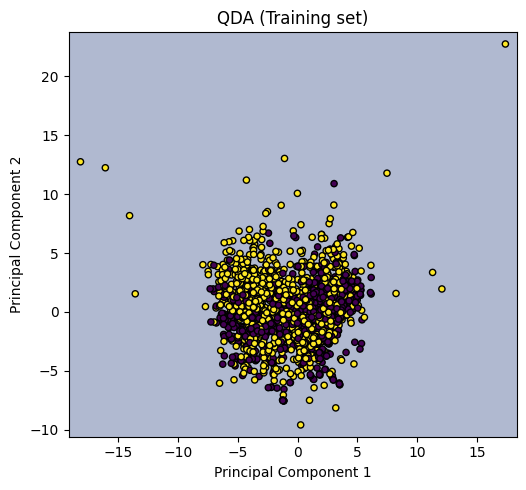

In [160]:
from sklearn.decomposition import PCA

# Reduce dimensionality to 2 features for visualization
pca = PCA(n_components=2)
attr_train_2d = pca.fit_transform(attr_train)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
x_min, x_max = attr_train_2d[:, 0].min() - 1, attr_train_2d[:, 0].max() + 1
y_min, y_max = attr_train_2d[:, 1].min() - 1, attr_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = qda.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(attr_train_2d[:, 0], attr_train_2d[:, 1], c=target_train, s=20, edgecolor='k')
plt.title('QDA (Training set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()
